<a href="https://colab.research.google.com/github/RDW287/CM3710-Coding-Assessment/blob/main/AI_Image_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [138]:
%cd CM3710-Coding-Assessment/
!git pull

[Errno 2] No such file or directory: 'CM3710-Coding-Assessment/'
/content/CM3710-Coding-Assessment
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 3 (delta 0), reused 0 (delta 0), pack-reused 0 (from 0)
Unpacking objects: 100% (3/3), 17.11 KiB | 5.70 MiB/s, done.
From https://github.com/RDW287/CM3710-Coding-Assessment
   fc84902..c6bbc72  main       -> origin/main
Updating fc84902..c6bbc72
Fast-forward
 AI_Image_Classifier.ipynb | 98 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++----------
 1 file changed, 84 insertions(+), 14 deletions(-)


#**Introduction**

The aim of this notebook is to create and compare to two AI algorithms to classify images from the selected dataset. The dataset is images captured using Meta glass, these include rooms and objects within RGU that are categorized/labelled by name.

In [157]:
# Required imports for code
import os
import re
import matplotlib.pyplot as plt
from collections import Counter
import numpy as np
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

No. Images:  98
Image Size: (360, 360)


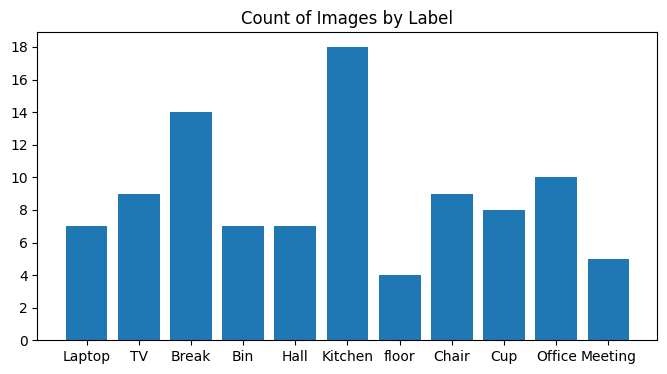

In [153]:
# Data Exploration

directory = "RGU_Images"


# Stores the names of the files, this will be used as the labels later
image_filenames = []
files = os.listdir(directory)
for file in files:
  name = re.split('_|-', file) #Splits file names by _ and - to get the label
  image_filenames.append(name[1])

# We can see that we have 98 images that are 360x360 pixels in size
print("No. Images: ", len(files))
print("Image Size:", Image.open(f'{directory}/{files[0]}').size)

# Gets the count of each label in the dataset
filename_count = Counter(image_filenames)

# The bar graph below shows that not all categories have equal amounts of images, 'floor' only
# has 4 whereas 'kitchen' has 18. In order to help the algorithms learn we should augment these
# images to increase the dataset size.
plt.figure(figsize=(8,4))
plt.bar(filename_count.keys(), filename_count.values())
plt.yticks(range(0,20,2))
plt.title("Count of Images by Label")
plt.show()

In [ ]:
# Data Preprocessing

# We will create a keras layer to apply augmentation techniques to expand our training set
data_augmentation = keras.Sequential([
    layers.Rescaling(1/255), #This will scale the image contents to between 0-1, this is min-max normalisation
    layers.RandomFlip("horizontal_and_vertical"), #Flips the image horizontally and/or vertically
    layers.RandomRotation(0.5), #Adds some rotation to the image
    layers.RandomCrop(150,150) #Zooms into a particular point by cropping the rest of the image
])

# This is what the original image looks like
img = plt.imread(f'{dir}/{files[1]}')
plt.imshow(img)
plt.title("Original Image")
plt.axis('off')
plt.show()

# These are examples of how the images will look after augmentation
fig, axs = plt.subplots(1, 3, figsize=(12, 4))
for i in range(3):
    augmented = data_augmentation(img)
    axs[i].imshow(augmented)
    axs[i].set_title(f"Augmented {i + 1}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

In [164]:
images = []
y_categorical = keras.utils.to_categorical(
    np.unique(image_filenames, return_inverse=True)[1]
)

X_train, X_test, y_train, y_test = train_test_split(
    images, y_categorical, test_size=0.2, random_state=42
)

ValueError: invalid literal for int() with base 10: 'Break'